In [1]:
import string

import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np
from scipy.ndimage import binary_erosion
import seaborn as sns

sns.set_theme()

In [2]:
d_scnn = nib.load("params.nii.gz").get_fdata()[..., 0].clip(0, 3)
d_mlp = nib.load("params_mlp.nii.gz").get_fdata()[..., 0].clip(0, 3)
d_smt = nib.load("../smt_maps.nii.gz").get_fdata()[..., -2].clip(0, 3)

f_scnn = nib.load("params.nii.gz").get_fdata()[..., 1].clip(0, 1)
f_mlp = nib.load("params_mlp.nii.gz").get_fdata()[..., 1].clip(0, 1)
f_smt = nib.load("../smt_maps.nii.gz").get_fdata()[..., -1].clip(0, 1)

In [3]:
mask = binary_erosion(
    nib.load("../data/mri/preprocessed/sub-07/brain_mask.nii.gz")
    .get_fdata()
    .astype(bool),
)

d_scnn[~mask] = np.nan
d_mlp[~mask] = np.nan
d_smt[~mask] = np.nan

f_scnn[~mask] = np.nan
f_mlp[~mask] = np.nan
f_smt[~mask] = np.nan

In [4]:
print(np.nanmean(d_scnn - d_mlp), np.nanstd(d_scnn - d_mlp))
print(np.nanmean(d_scnn - d_smt), np.nanstd(d_scnn - d_smt))
print(np.nanmean(d_mlp - d_smt), np.nanstd(d_mlp - d_smt))
print("")
print(np.nanmean(f_scnn - f_mlp), np.nanstd(f_scnn - f_mlp))
print(np.nanmean(f_scnn - f_smt), np.nanstd(f_scnn - f_smt))
print(np.nanmean(f_mlp - f_smt), np.nanstd(f_mlp - f_smt))

0.024390468973692476 0.08052109701014488
0.009052481804342734 0.12698793349621046
-0.015337987169349757 0.09221550695810468

0.005235045854398183 0.03629739652226603
0.0010106146194695115 0.04515910949351717
-0.004224431234928671 0.03860214223877653


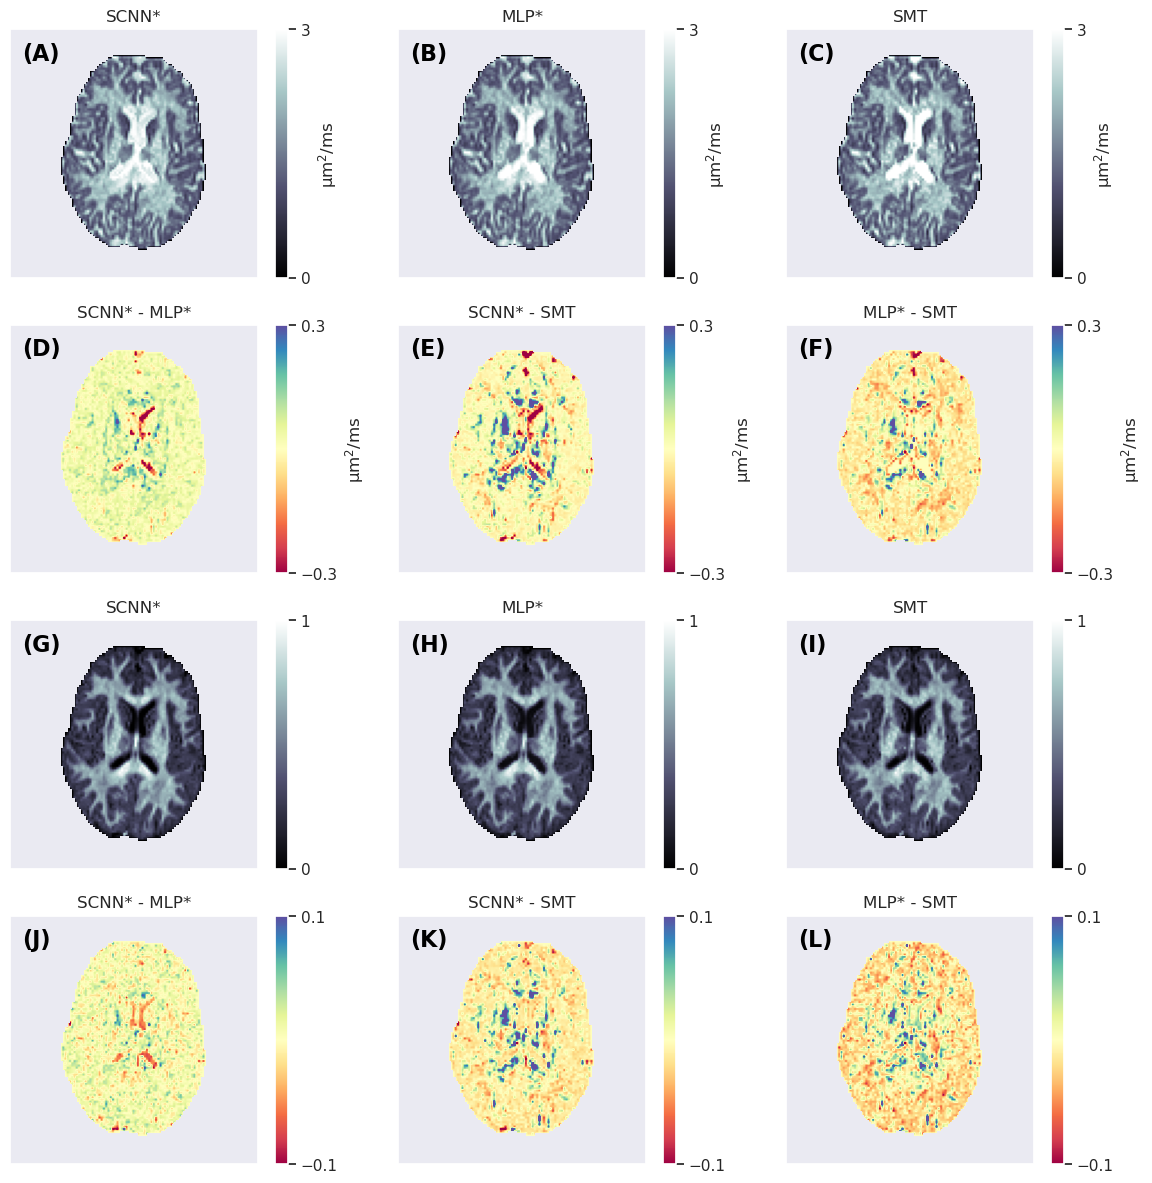

In [5]:
z = 37
alphabet = list(string.ascii_uppercase)

fig, axs = plt.subplots(4, 3, figsize=(12, 12))
data_arrays_1 = [d_scnn, d_mlp, d_smt]
titles_1 = ["sCNN*", "MLP*", "SMT"]
for i in range(3):
    im = axs[0, i].imshow(
        np.rot90(data_arrays_1[i])[..., z], cmap="bone", vmin=0, vmax=3
    )
    cbar = fig.colorbar(im, ax=axs[0, i])
    cbar.set_ticks([0, 3])
    cbar.set_label(r"μm$^2$/ms")
    axs[0, i].grid(False)
    axs[0, i].set_xticks([])
    axs[0, i].set_yticks([])
    axs[0, i].set_title(titles_1[i])
    axs[0, i].text(
        0.05,
        0.95,
        f"({alphabet[i]})",
        transform=axs[0, i].transAxes,
        fontsize=16,
        verticalalignment="top",
        color="black",
        weight="bold",
    )
comparison_pairs_2 = [(d_scnn, d_mlp), (d_scnn, d_smt), (d_mlp, d_smt)]
titles_2 = ["sCNN* - MLP*", "sCNN* - SMT", "MLP* - SMT"]
for i in range(3):
    im = axs[1, i].imshow(
        np.rot90(comparison_pairs_2[i][0] - comparison_pairs_2[i][1])[..., z],
        cmap="Spectral",
        vmin=-0.3,
        vmax=0.3,
    )
    cbar = fig.colorbar(im, ax=axs[1, i])
    cbar.set_label(r"μm$^2$/ms")
    cbar.set_ticks([-0.3, 0.3])
    axs[1, i].grid(False)
    axs[1, i].set_xticks([])
    axs[1, i].set_yticks([])
    axs[1, i].set_title(titles_2[i])
    axs[1, i].text(
        0.05,
        0.95,
        f"({alphabet[i + 3]})",
        transform=axs[1, i].transAxes,
        fontsize=16,
        verticalalignment="top",
        color="black",
        weight="bold",
    )
data_arrays_3 = [f_scnn, f_mlp, f_smt]
titles_3 = ["sCNN*", "MLP*", "SMT"]
for i in range(3):
    im = axs[2, i].imshow(
        np.rot90(data_arrays_3[i])[..., z], cmap="bone", vmin=0, vmax=1
    )
    cbar = fig.colorbar(im, ax=axs[2, i])
    cbar.set_ticks([0, 1])
    axs[2, i].grid(False)
    axs[2, i].set_xticks([])
    axs[2, i].set_yticks([])
    axs[2, i].set_title(titles_3[i])
    axs[2, i].text(
        0.05,
        0.95,
        f"({alphabet[i + 6]})",
        transform=axs[2, i].transAxes,
        fontsize=16,
        verticalalignment="top",
        color="black",
        weight="bold",
    )
comparison_pairs_4 = [(f_scnn, f_mlp), (f_scnn, f_smt), (f_mlp, f_smt)]
titles_4 = ["sCNN* - MLP*", "sCNN* - SMT", "MLP* - SMT"]
for i in range(3):
    im = axs[3, i].imshow(
        np.rot90(comparison_pairs_4[i][0] - comparison_pairs_4[i][1])[..., z],
        cmap="Spectral",
        vmin=-0.1,
        vmax=0.1,
    )
    cbar = fig.colorbar(im, ax=axs[3, i])
    cbar.set_ticks([-0.1, 0.1])
    axs[3, i].grid(False)
    axs[3, i].set_xticks([])
    axs[3, i].set_yticks([])
    axs[3, i].set_title(titles_4[i])
    axs[3, i].text(
        0.05,
        0.95,
        f"({alphabet[9 + i]})",
        transform=axs[3, i].transAxes,
        fontsize=16,
        verticalalignment="top",
        color="black",
        weight="bold",
    )
fig.tight_layout()
fig.savefig("combined_figure.png", dpi=300)
plt.show()